# Assignment 1: Exploratory Data Analysis NLP

## 0.0 Import Data & Library

In [92]:
# Import Libraries
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import gensim

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os, json

In [9]:
# Import JSON file to Dataframe

# Define directory and list (store the Json rows)
json_dir = '/Users/steveg/Documents/Coding & Development Related/Parker Dewey/Micro-Internship2/Assignments/Assignment1/openave_jsons'
data_list = []

# Open directory & Import data from each Json fileinto the list
for filename in os.listdir(json_dir):
    if filename.endswith(".json"):
        with open (os.path.join(json_dir,filename), mode="r") as json_file:
            data_list.append(json.load(json_file))

# Import list to dataframe
report = pd.DataFrame(data_list)

In [10]:
report.head()

,ReportText,findings,clinicaldata,ExamName,impression
0,EXAM: CHEST RADIOGRAPHY EXAM DATE: 10/08/2020 ...,FINDINGS: Lungs/Pleura: Mild pulmonary vascula...,CLINICAL HISTORY: Hypoxia. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 10/08/2020 ...,IMPRESSION: 1. Mild pulmonary vascular congest...
1,PROCEDURE: CR CHEST 2V COMPARISON: None. INDIC...,FINDINGS: LUNGS: Normal. No significant pulmon...,INDICATIONS: Acute onset cough for three weeks...,PROCEDURE: CR CHEST 2V\n\nCOMPARISON: None.,CONCLUSION: Normal examination.
2,EXAM: Chest 1 view HISTORY: Chest pain TECHNIQ...,FINDINGS: No confluent infiltrates or pleural ...,HISTORY: Chest pain \n\n,EXAM: Chest 1 view\n\nTECHNIQUE: X-ray image o...,IMPRESSION: No acute cardiopulmonary abnormali...
3,EXAM: CHEST RADIOGRAPHY EXAM DATE: 02/21/2020 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 02/21/2020 ...,IMPRESSION: Normal single view chest.
4,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/14/2021 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Shortness of breath. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/14/2021 ...,IMPRESSION: Normal single view chest.


## 1.0 Character Length

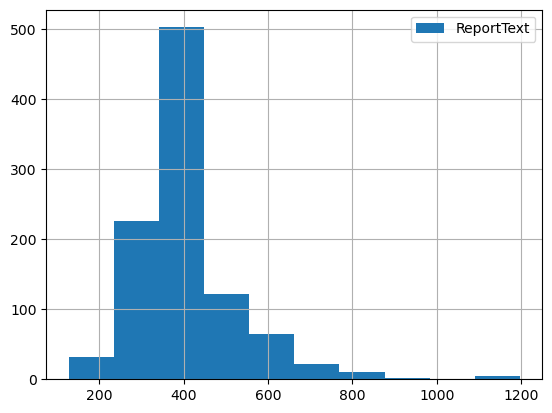

In [65]:
p = report['ReportText'].str.len().hist()
p.legend(["ReportText"])

# Observation for "Report Text":
# Range; 100 - 1000
# Frequency: 250 - 550
# Most Frequent Character Length: 350 - 450

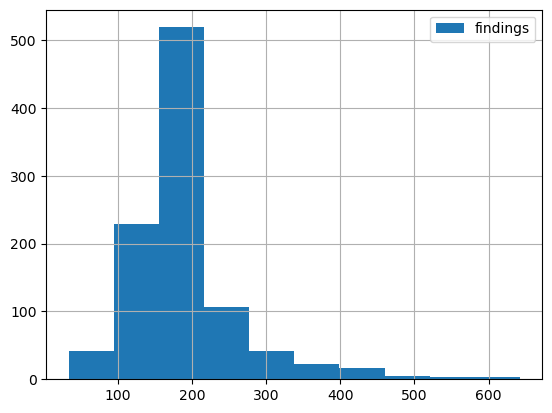

In [66]:
p= report['findings'].str.len().hist()
p.legend(["findings"])

# Observation for "findings":
# Range; 50 - 650
# Most Frequent Character Length: 180 - 200

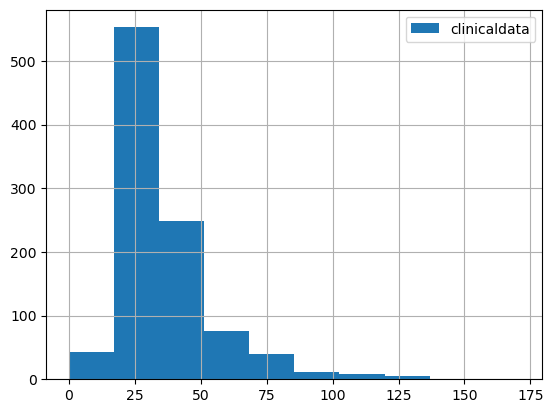

In [67]:
p = report['clinicaldata'].str.len().hist()
p.legend(["clinicaldata"])

# Observation:
# Range; 0 - 135
# Most Frequent Character Length: 15 - 30

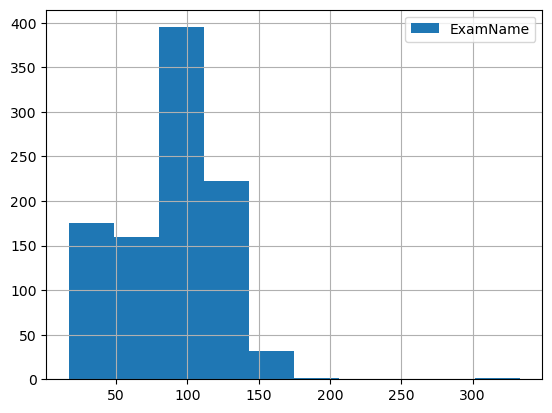

In [68]:
p = report['ExamName'].str.len().hist()
p.legend(["ExamName"])

# Observation:
# Range: 25 - 200
# Most Frequent Character Length: 75 - 125

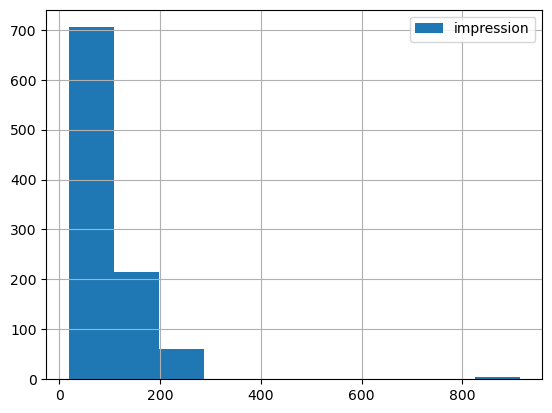

In [69]:
p = report['impression'].str.len().hist()
p.legend(["impression"])

# Observation:
# Range: 0 - 300
# Most Frequent Character Length: 0 - 100

In [71]:
# Summary Observation:
# Columns Ranking of Character Length: Report Text > findings > ExamName > impression > clinical data
# By looking at the range: impression and clinical data might have no text at all
# "Exam Name" and "Impression" tend to have closer distribution

## 1.1 Word Count

In [77]:
# Word Count Function Definition
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

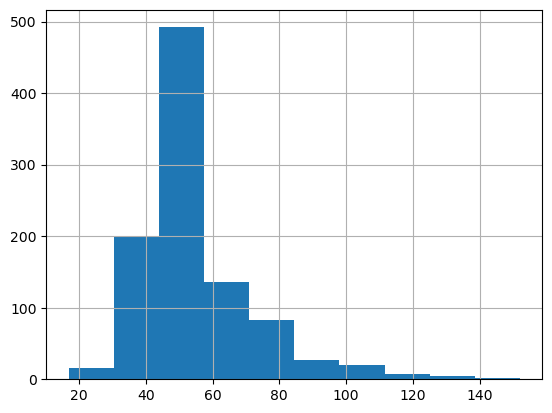

In [78]:
plot_word_number_histogram(report['ReportText'])

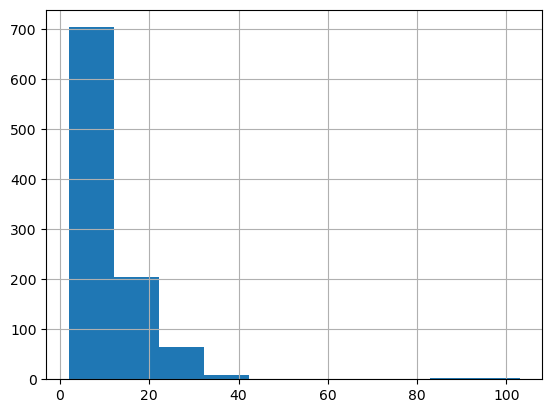

In [79]:
plot_word_number_histogram(report['impression'])

## 1.2 Word Length

In [94]:
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

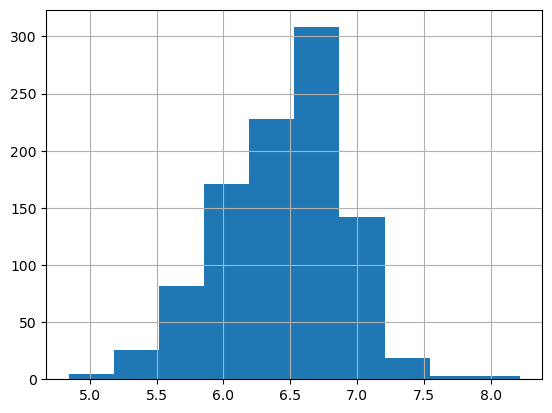

In [95]:
plot_word_length_histogram(report['ReportText'])

/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


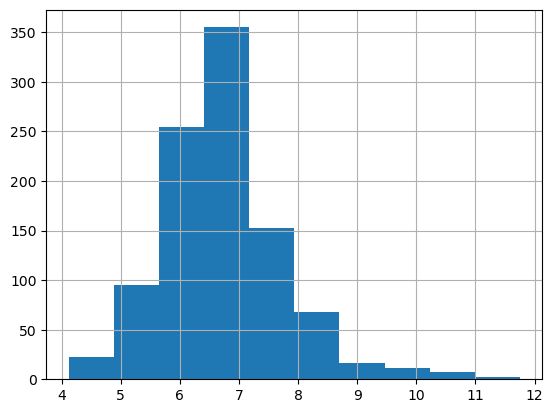

In [99]:
plot_word_length_histogram(report['clinicaldata'])

## 2.1 N-Gram Exploration

In [58]:
def get_top_ngram(corpus, n=None):
    # Define and Fit the model
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    # Bag-of-words Embedding
    bag_of_words = vec.transform(corpus)
    # print(bag_of_words)
    
    # Mapping of 2-gram words --> index 
    # print(vec.vocabulary_)
    
    # Count of 2-gram word frequency (Sorted Desc Order)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

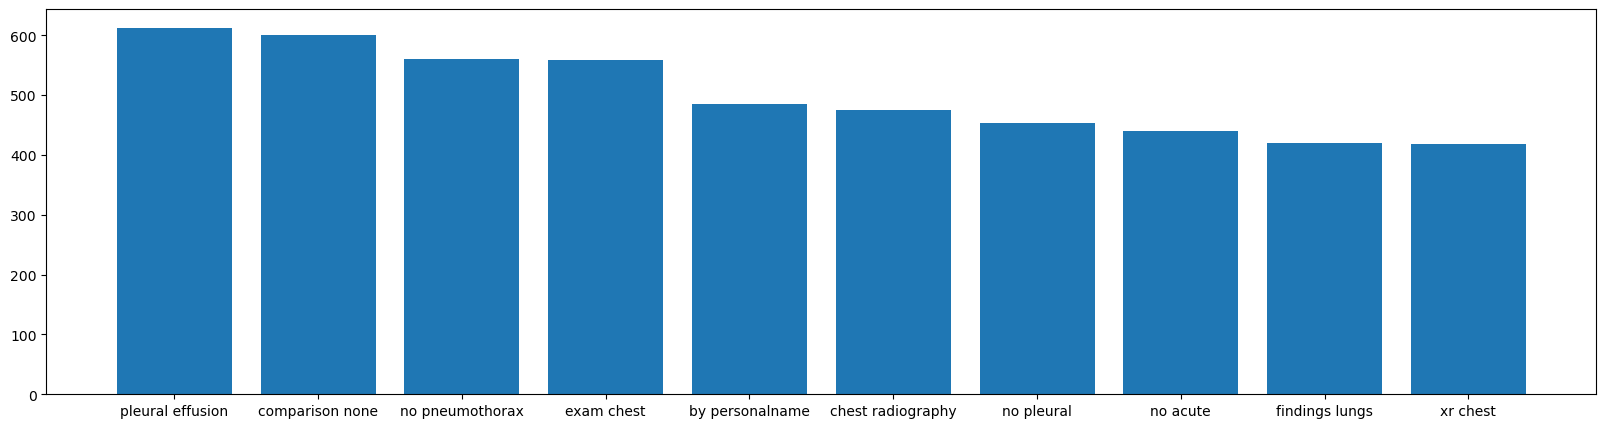

In [62]:
## Report Text Column

# Frequency of 2-gram words
top_n_bigrams=get_top_ngram(report['ReportText'],2) 

# Convert to List
x,y=map(list,zip(*top_n_bigrams)) 

# Frequency Visualization
fig = plt.figure(figsize =(20, 5))
plt.bar(x,y)
plt.show()

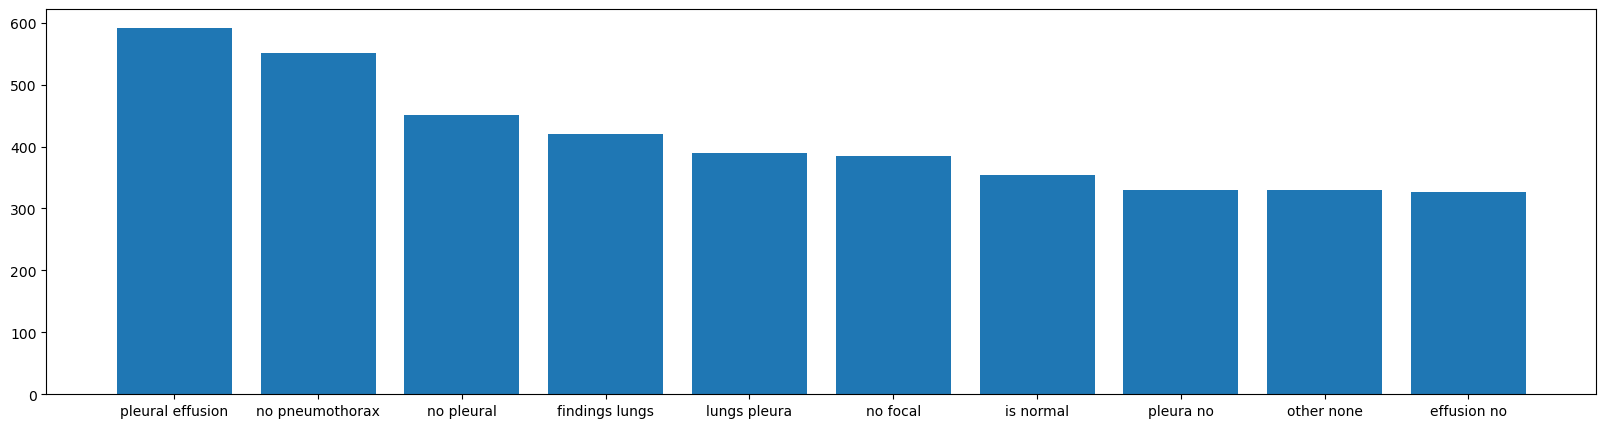

In [63]:
## Findings Column

# Frequency of 2-gram words
top_n_bigrams=get_top_ngram(report['findings'],2) 

# Convert to List
x,y=map(list,zip(*top_n_bigrams)) 

# Frequency Visualization
fig = plt.figure(figsize =(20, 5))
plt.bar(x,y)
plt.show()

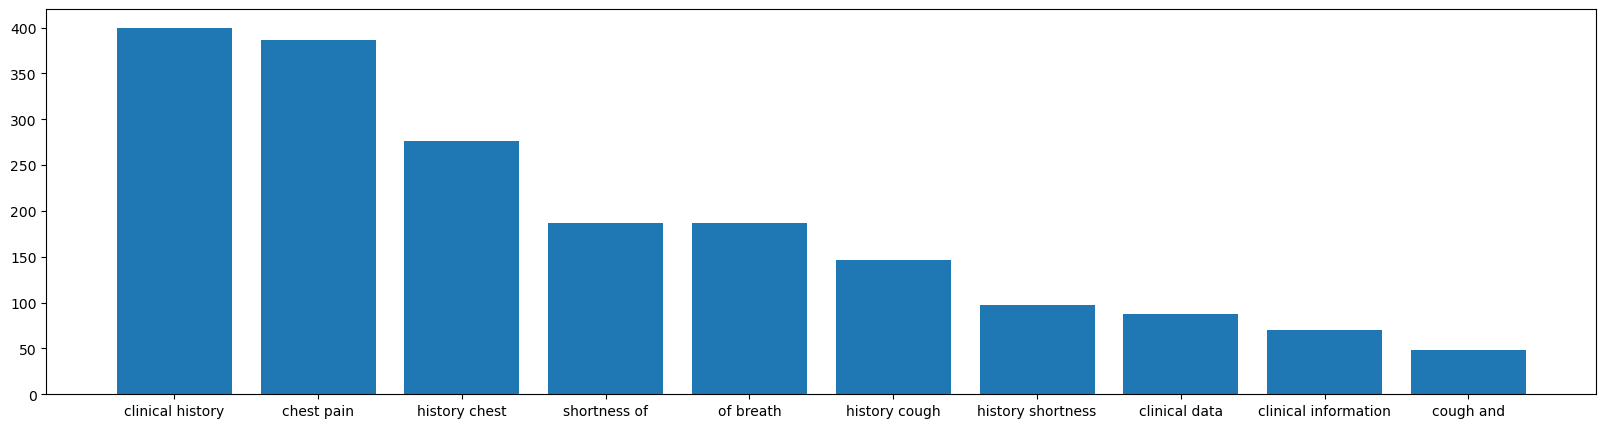

In [65]:
## Clinical Data

# Frequency of 2-gram words
top_n_bigrams=get_top_ngram(report['clinicaldata'],2) 

# Convert to List
x,y=map(list,zip(*top_n_bigrams)) 

# Frequency Visualization
fig = plt.figure(figsize =(20, 5))
plt.bar(x,y)
plt.show()

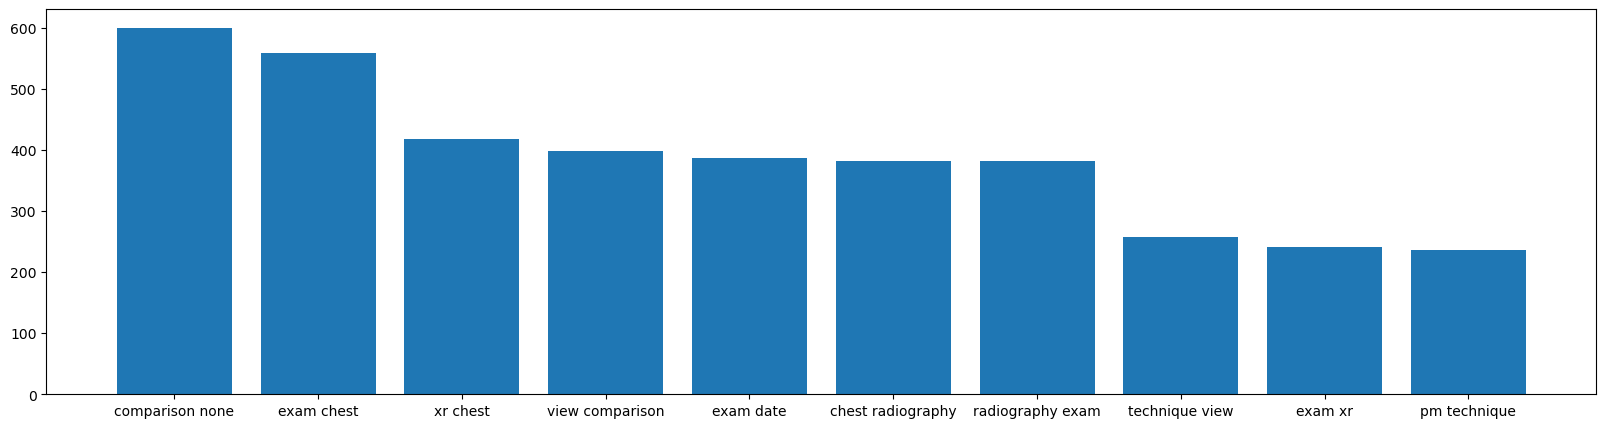

In [66]:
## Exam Name

# Frequency of 2-gram words
top_n_bigrams=get_top_ngram(report['ExamName'],2) 

# Convert to List
x,y=map(list,zip(*top_n_bigrams)) 

# Frequency Visualization
fig = plt.figure(figsize =(20, 5))
plt.bar(x,y)
plt.show()

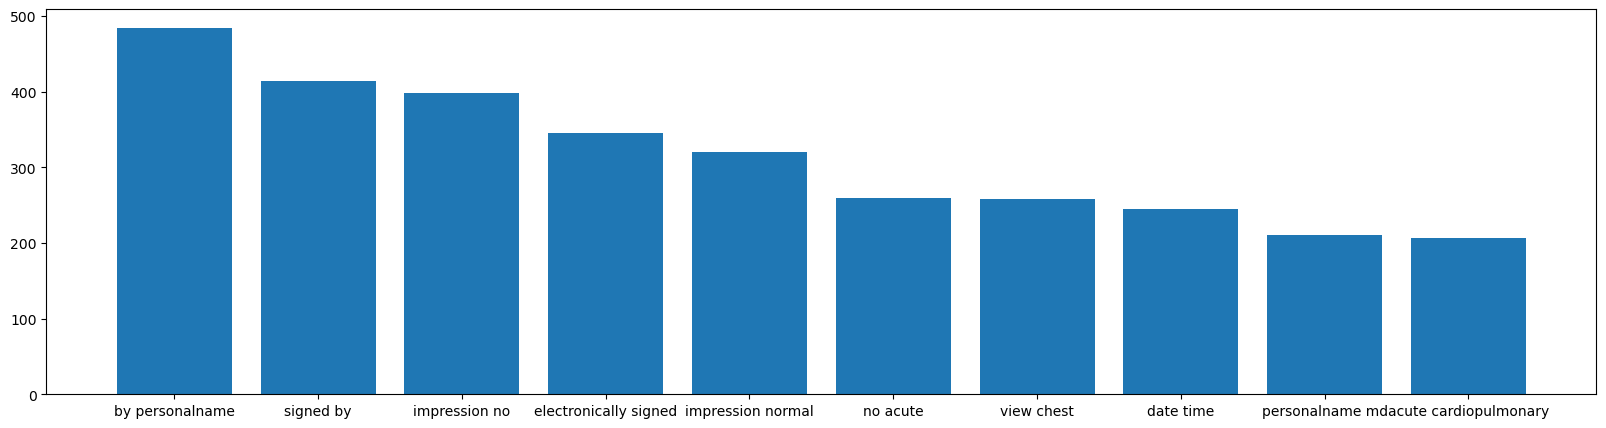

In [68]:
## Impression

# Frequency of 2-gram words
top_n_bigrams=get_top_ngram(report['impression'],2) 

# Convert to List
x,y=map(list,zip(*top_n_bigrams)) 

# Frequency Visualization
fig = plt.figure(figsize =(20, 5))
plt.bar(x,y)
plt.show()

## 3.1 Topic Modeling Exploration

In [96]:
nltk.download('punkt') # Used for Tokenizer
nltk.download('wordnet') # Used for Lemmatizer
nltk.download('stopwords') # Used for StopWord   
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_reports(df, col):
    # Initialize Corpus
    corpus=[]
    # Initialize WordNet Lemmatizer Model and Stopword Model
    lem=WordNetLemmatizer()
    stop=set(stopwords.words('english'))
    for doc in df[col]:
        # Tokenize document and remove stopwords
        words=[w for w in word_tokenize(doc) if (w not in stop)]
        # Lemmatize word
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        # Append words to Corpus
        corpus.append(words)
    return corpus

[nltk_data] Downloading package punkt to /Users/steveg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/steveg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/steveg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
def LDA_model(df, col):
    # Pre-Processing Step (Tokenization, Stopword Removal, Lemmatization)
    corpus=preprocess_reports(df, col)

    # Create Bag_of_Word Embedding
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]

    # Define Latent Dirichlet Allocation Model
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)

In [98]:
model = LDA_model(report, 'ReportText')

In [99]:
lda_model.show_topics()

[(0,
  '0.027*"The" + 0.021*"acute" + 0.020*"IMPRESSION" + 0.020*"There" + 0.020*"COMPARISON" + 0.020*"FINDINGS" + 0.019*"CHEST" + 0.018*"PERSONALNAME" + 0.018*"EXAM" + 0.017*"normal"'),
 (1,
  '0.045*"Dictated" + 0.037*"date/time" + 0.026*"CHEST" + 0.023*"PERSONALNAME" + 0.021*"Signed" + 0.021*"chest" + 0.021*"normal" + 0.020*"Electronically" + 0.018*"Comparison" + 0.017*"Findings"'),
 (2,
  '0.031*"CHEST" + 0.029*"chest" + 0.023*"FINDINGS" + 0.023*"COMPARISON" + 0.023*"IMPRESSION" + 0.019*"normal" + 0.019*"PERSONALNAME" + 0.018*"pleural" + 0.016*"Normal" + 0.016*"effusion"'),
 (3,
  '0.049*"EXAM" + 0.038*"CHEST" + 0.037*"None" + 0.036*"view" + 0.025*"Normal" + 0.025*"Mediastinum" + 0.025*"HISTORY" + 0.025*"TECHNIQUE" + 0.025*"RADIOGRAPHY" + 0.025*"effusion"')]

## 4.1 Word Cloud

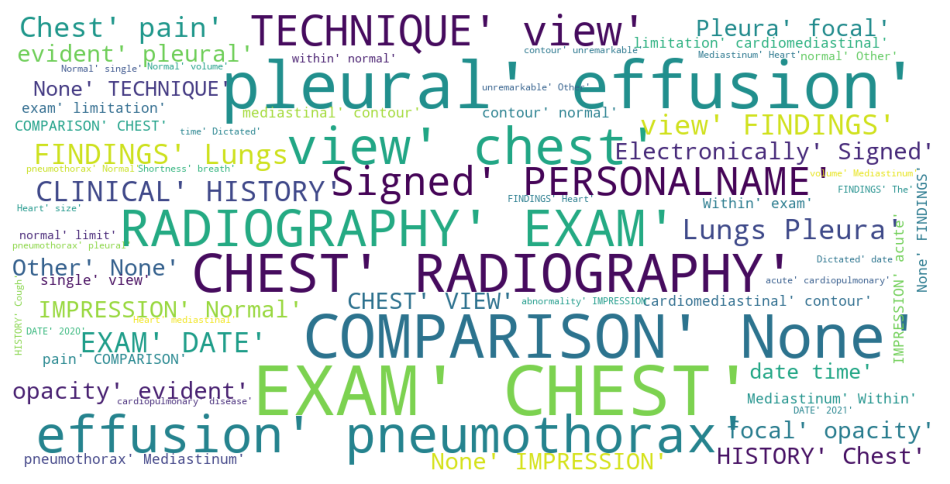

In [100]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)